# Plotting the data from the history file

There are a sample history.data and profiles in this directory, so you can experiment before getting your own models.

Load the python libraries that we will need -- numpy and matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Load the data from the history file.  It has a five header rows and then a row with the names of all of columns

In [2]:
data=np.genfromtxt("history_example.data",skip_header=5,names=True,unpack=True)
data2=np.genfromtxt("history_52.data",skip_header=5,names=True,unpack=True)

Plot luminosity against effective temperature (why is it a straight line?)

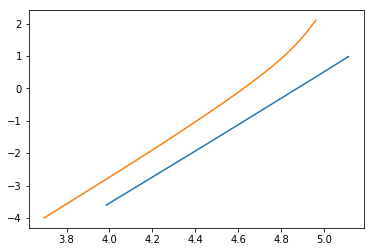

In [3]:
plt.plot(data['log_Teff'],data['log_L'])
plt.plot(data2['log_Teff'],data2['log_L'])
plt.show()

Plot luminosity against age (what are the different regimes?)

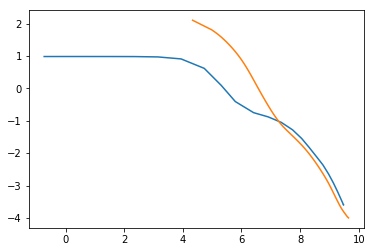

In [4]:
plt.plot(np.log10(data['star_age']),data['log_L'])
plt.plot(np.log10(data2['star_age']),data2['log_L'])
plt.show()

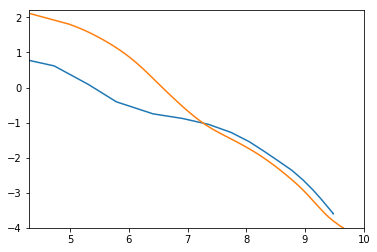

In [5]:
plt.plot(np.log10(data['star_age']),data['log_L'])
plt.plot(np.log10(data2['star_age']),data2['log_L'])
plt.xlim(4.3,10)
plt.ylim(-4,2.2)
plt.show()

# Convert MESA output to observable magnitudes
Add the observable absolute magnitudes to the history data

In [6]:
run ./paintisochrone.py history_example.data colmag.Bergeron_New.all.Vega.txt paintedhistory_ex.data

In [7]:
run ./paintisochrone.py history_52.data colmag.Bergeron_New.all.Vega.txt paintedhistory_52.data

In [8]:
pdata=np.genfromtxt("paintedhistory_ex.data",names=True,skip_header=1,unpack=True)
pdata_52=np.genfromtxt("paintedhistory_52.data",names=True,skip_header=1,unpack=True)

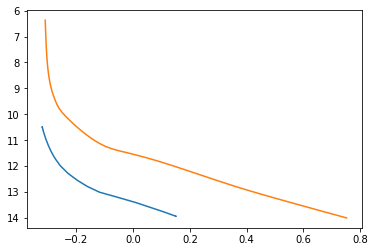

In [9]:
plt.plot(pdata['F606W']-pdata['F814W'],pdata['F814W'])
plt.plot(pdata_52['F606W']-pdata_52['F814W'],pdata_52['F814W'])
plt.gca().invert_yaxis()
plt.show()

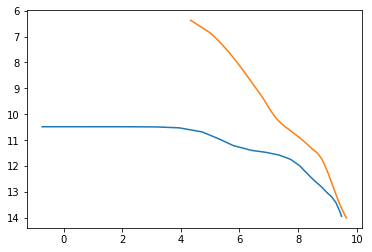

In [10]:
plt.plot(np.log10(pdata['star_age']),pdata['F814W'])
plt.plot(np.log10(pdata_52['star_age']),pdata_52['F814W'])
plt.gca().invert_yaxis()
plt.show()

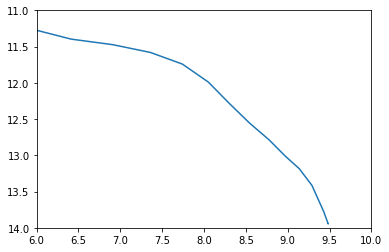

In [11]:
plt.plot(np.log10(pdata['star_age']),pdata['F814W'])
plt.xlim(6,10)
plt.ylim(11,14)
plt.gca().invert_yaxis()
plt.show()

Now we load the cumulative luminosity function from 47 Tuc.

In [12]:
data47=np.genfromtxt("47tuc_fromIR.dat",names=True,skip_header=1,unpack=True)

And we plot the CMD for the observed white dwarf and for the two models. For the models, we have to add some reddening (0.065) and the distance modulus (13.45).

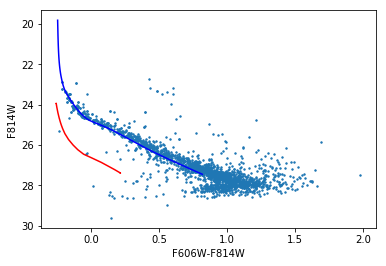

In [13]:
plt.scatter(data47['F606mF814'],data47['F814'],s=2)
plt.plot(pdata['F606W']-pdata['F814W']+0.065,pdata['F814W']+13.45,c='r')
plt.plot(pdata_52['F606W']-pdata_52['F814W']+0.065,pdata_52['F814W']+13.45,c='b')
plt.gca().invert_yaxis()
plt.xlabel('F606W-F814W')
plt.ylabel('F814W')
plt.show()

We now plot the magnitude against age including the distance moduls again for the theoretical models and we compare it with the cumulative luminosity function calculated with a birth rate of 1 per 6e6 year. Since we chose the zero age of the white dwarf rather arbitrarily, we have to adjust the age in order to get a good fit. Here we add 0.22 to the log of the age.

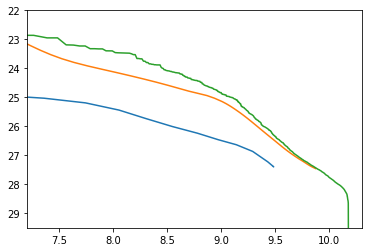

In [14]:
plt.plot(np.log10(pdata['star_age']),pdata['F814W']+13.45)
plt.plot(np.log10(pdata_52['star_age'])+0.22,pdata_52['F814W']+13.45)
plt.plot(np.log10(data47['cumweight']*6e6),data47['F814'])
plt.xlim(7.2,10.3)
plt.ylim(22,29.5)
plt.gca().invert_yaxis()
plt.show()

# Let's work with the UV data now

In [15]:
data47UV=np.genfromtxt("47tuc_fromUV.dat",names=True,skip_header=1,unpack=True)

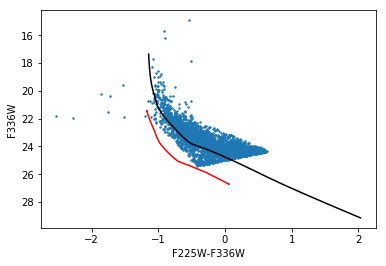

In [16]:
plt.scatter(data47UV['F225mF336'],data47UV['F336'],s=2)
plt.plot(pdata['F225W']-pdata['F336W'],pdata['F336W']+13.45,c='r')
plt.plot(pdata_52['F225W']-pdata_52['F336W'],pdata_52['F336W']+13.45,c='k')
plt.gca().invert_yaxis()
plt.xlabel('F225W-F336W')
plt.ylabel('F336W')
plt.show()

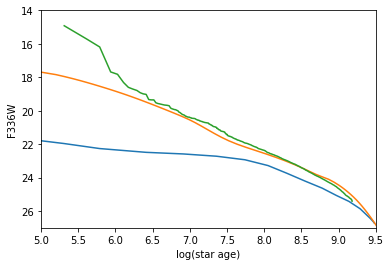

In [17]:
plt.plot(np.log10(pdata['star_age']),pdata['F336W']+13.45)
plt.plot(np.log10(pdata_52['star_age'])+0.22,pdata_52['F336W']+13.45)
plt.plot(np.log10(data47UV['cumweight']*2e5),data47UV['F336'])
plt.xlim(5,9.5)
plt.ylim(14,27)
plt.gca().invert_yaxis()
plt.xlabel('log(star age)')
plt.ylabel('F336W')
plt.show()

In [18]:
run ./paintisochrone.py history_hicool.data colmag.Bergeron_New.all.Vega.txt paintedhistory_hicool.data

In [19]:
pdata_hi=np.genfromtxt("paintedhistory_hicool.data",names=True,skip_header=1,unpack=True)

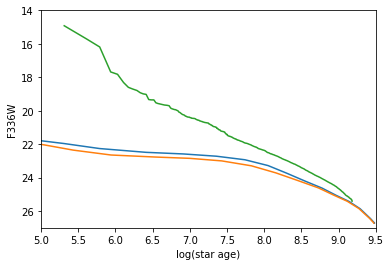

In [20]:
plt.plot(np.log10(pdata['star_age']),pdata['F336W']+13.45)
plt.plot(np.log10(pdata_hi['star_age']),pdata_hi['F336W']+13.45)
plt.plot(np.log10(data47UV['cumweight']*2e5),data47UV['F336'])
plt.xlim(5,9.5)
plt.ylim(14,27)
plt.gca().invert_yaxis()
plt.xlabel('log(star age)')
plt.ylabel('F336W')
plt.show()

In [21]:
print(pdata['star_mass'][-1])

1.171297854604033
